# StockPricePredWithLinReg
Testing how good a simple model like a linear Regression can perform to predict stock prices. I will try to predict next days close price. The stock that is being analyzed is The Walt Disney Company.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_datareader as web

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print("imports complete.")

imports complete.


# Data

In [2]:
dfDis=web.DataReader("DIS", data_source="yahoo", start="2010-01-01", end = "2021-1-23")# read data

dfDis["closeNext"]=dfDis.Close.shift(periods=-1) # create feature we want to predict
dfDis.drop(dfDis.tail(1).index, inplace=True)# remove last row because we don't know the next Close

dfDis.head()

,High,Low,Open,Close,Volume,Adj Close,closeNext
Date,,,,,,,
2010-01-04,32.750000,31.870001,32.50,32.070000,13700400.0,27.933924,31.990000
2010-01-05,32.160000,31.700001,32.07,31.990000,10307700.0,27.864237,31.820000
2010-01-06,32.000000,31.680000,31.90,31.820000,10709500.0,27.716166,31.830000
2010-01-07,31.860001,31.540001,31.77,31.830000,8202100.0,27.724878,31.879999
2010-01-08,31.940001,31.530001,31.66,31.879999,7657500.0,27.768419,31.360001


<AxesSubplot:>

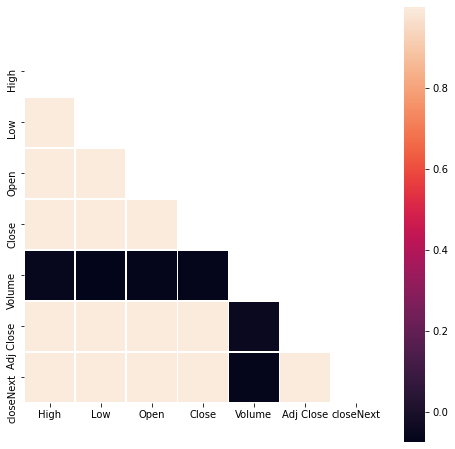

In [3]:
# to show these features are usefull for predicting the next close price
f, ax = plt.subplots(figsize=(8, 8))

# fill the duplicates with white
mask = np.triu(np.ones_like(dfDis.corr(), dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dfDis.corr(), mask=mask, square=True, linewidths=.5)

Volume seems to be a bad feature, so I will remove it

In [4]:
dfDis.drop("Volume", axis=1, inplace=True)
dfDis.tail()

,High,Low,Open,Close,Adj Close,closeNext
Date,,,,,,
2021-01-14,178.350006,173.399994,177.009995,173.429993,173.429993,171.440002
2021-01-15,174.190002,170.169998,172.949997,171.440002,171.440002,172.259995
2021-01-19,173.710007,171.440002,172.100006,172.259995,172.259995,173.639999
2021-01-20,177.880005,173.000000,175.220001,173.639999,173.639999,171.279999
2021-01-21,175.000000,171.020004,173.240005,171.279999,171.279999,172.779999


Test train split

In [5]:
Y = dfDis["closeNext"]
dfDis.drop("closeNext", axis=1, inplace = True)

In [6]:
test_size=.15
XTrain, XTest, YTrain, YTest = train_test_split(dfDis, Y, test_size=test_size, random_state=42) #cross validation
print("XTrain: ", XTrain.head())
print("XTest: ", XTest.head())
print("YTrain: ", YTrain.head())
print("YTest: ", YTest.head())


XTrain:                    High         Low        Open       Close   Adj Close
Date                                                                  
2017-08-02  109.879997  107.519997  109.879997  108.669998  104.838745
2019-09-17  136.729996  135.669998  135.800003  136.309998  135.498199
2011-10-14   34.529999   33.910000   34.020000   34.470001   30.352797
2015-03-30  106.949997  106.050003  106.059998  106.120003   98.905266
2020-04-28  110.059998  105.980003  108.790001  106.209999  106.209999
XTest:                    High         Low        Open       Close   Adj Close
Date                                                                  
2017-03-06  110.980003  110.089996  110.769997  110.669998  105.979836
2018-08-08  116.410004  113.900002  115.900002  113.980003  111.737129
2015-10-15  108.000000  106.260002  106.500000  107.889999  101.139755
2015-11-18  118.279999  116.050003  116.220001  118.139999  110.748451
2019-06-06  137.440002  135.729996  136.509995  137.210007  

# Linear Regression Pipeline

In [7]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(XTrain, YTrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [8]:
predictions=pipe.predict(XTest)
MSE = mean_squared_error(predictions, YTest)
print (str(MSE) + ' MSE')

2.66101139557404 MSE


In [9]:
YTest

Date
2017-03-06    110.860001
2018-08-08    114.160004
2015-10-15    108.239998
2015-11-18    118.709999
2019-06-06    138.039993
                 ...    
2012-04-11     42.150002
2010-06-14     34.990002
2010-03-18     33.639999
2016-01-06     99.500000
2012-03-30     43.840000
Name: closeNext, Length: 418, dtype: float64

In [10]:
vis=[YTest,predictions]

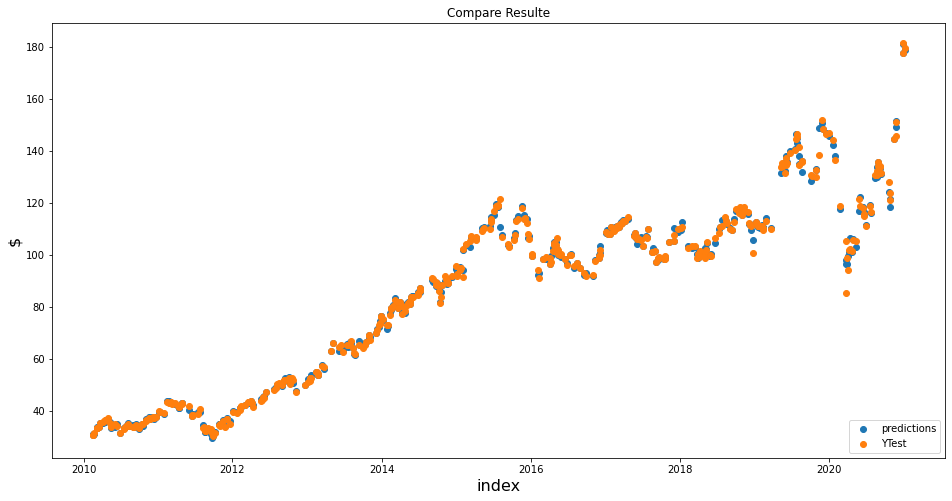

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.ylabel("$", fontsize=16)
plt.xlabel("index", fontsize=16)
plt.title("Compare Resulte")
plt.scatter(x=vis[0].index,y=vis[0],linewidth=1)
plt.scatter(x=vis[0].index,y=vis[1],linewidth=1)
plt.legend([ "predictions", "YTest"], loc="lower right")
plt.show()